In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/linear_regression_dataset.csv')
df.head()

,Feature1,Feature2,Target
0,37.454012,1.571459,127.431713
1,95.071431,31.820521,398.713585
2,73.199394,15.717799,290.564202
3,59.865848,25.428535,253.244024
4,15.601864,45.378324,164.020917


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term



In [31]:
import numpy as np
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
w


array([-2.06742511,  3.47500221,  2.15743475])

In [32]:
predictions = X_test @ w
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

66.64320988651784

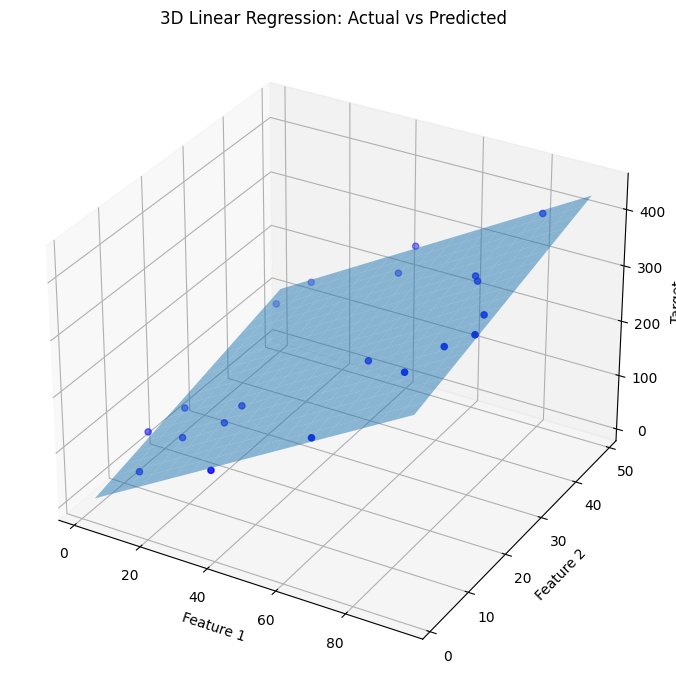

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Unpack weights
w = np.array(w).flatten()
bias = w[0]
weights = w[1:]

# Extract features (assuming X_test includes bias column as first column)
feature1 = X_test[:, 1]  # column for Feature1
feature2 = X_test[:, 2]  # column for Feature2
target = y_test.flatten()  # actual target values

# Create grid for regression plane
f1_range = np.linspace(feature1.min(), feature1.max(), 20)
f2_range = np.linspace(feature2.min(), feature2.max(), 20)
f1_grid, f2_grid = np.meshgrid(f1_range, f2_range)

# Compute predicted values over grid
y_grid = bias + weights[0] * f1_grid + weights[1] * f2_grid

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual test data points
ax.scatter(feature1, feature2, target, color='blue', label='Actual Data')

# Plot the regression plane
ax.plot_surface(f1_grid, f2_grid, y_grid, alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()
